In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df = pd.read_csv(r'C:\Users\brian\Desktop\JUNSOO\exhibition\data\final_data.csv' , encoding ='cp949')

df.replace(['유','무','시설없음'] , [1,0,0] , inplace = True)
df.replace(['적정설치' , '단순설치' , '미설치' ], [2,1,0] , inplace = True)

In [2]:
# 교육시설점수
alpha = 0.5

a1 = df.loc[: , ['x1','x2','x3','x28','x29','x30']].sum(axis = 1) 
a2 = alpha*np.log(df["x9"])

df['s1'] = a1 + a2

In [3]:
# 교육과정운영점수

beta = 0.7
delta = 0.05

b1 = df.loc[:, ['x6','x7','x8']].sum(axis = 1)
b2 = beta*np.log(df['x5'])
b3 = delta*np.log(df['x4'])

s2 = b1 + b2 + b3
df['s2'] = b2 + b3



In [4]:
#안전교육시간이수 점수

s3 = df.loc[: , 'x10':'x16'].sum(axis =1) + 0.1
df['s3'] = np.log(s3)

#베리어 프리 점수
s4 = df.loc[: , 'x17':'x27'].sum(axis = 1) + 0.1
df['s4'] = np.log(s4)


In [5]:
# EDA 행할 데이터프레임
df1 = df.loc[:,'y':'s4']

In [6]:
# 1)-1 총 점수와 각 카테고리 간 상관계수분석
df1.corr(method = 'pearson')

,y,s1,s2,s3,s4
y,1.000000,0.766476,0.326977,0.554927,0.250225
s1,0.766476,1.000000,0.243463,0.004165,0.118261
s2,0.326977,0.243463,1.000000,-0.154232,-0.006954
s3,0.554927,0.004165,-0.154232,1.000000,0.034972
s4,0.250225,0.118261,-0.006954,0.034972,1.000000


s1 : 교육시설점수
s2 : 교육과정 운영점수
s3 : 안전교육시간이수점수
s4 : 베리어 프리점수
y : 최종 학교평가점수

1) 카테고리별 학교평가점수와의 상관관계
s1(교육시설점수)과 s3(안전교육시간이수점수)의 경우 최종 학교평가 점수와 강한 상관관계를 보인다.
s2(교육과정 운영점수)와 s4(베리어 프리점수)의 경우 최종학교평가와 강한 상관관계를 보이지는 않지만 '정'의 관계를 가지고있다고 할 수 있다.

2) 카테고리간 상관관계
s1 ~ s4간의 상관관계가 매우 낮다고 할 수 있으므로 독립변수간 관계는 '선형 독립'이라고 할 수 있다.

In [7]:
# 1) - 2 공시연도 간 카테고리 점수
# key 값에서 공시연도 추출

df_key = pd.DataFrame(df['key'])
df1 = pd.concat([df1 , df_key] , axis = 1)


In [8]:
df1['key'] = df1['key'].astype(str)
df1['공시 연도'] = df.key.str.split('-').str[1]

In [9]:
# 공시연도 별 카테고리 점수평균
score_group_s1 = df1.groupby(['공시 연도'])['s1'].mean()
score_group_s2 = df1.groupby(['공시 연도'])['s2'].mean()
score_group_s3 = df1.groupby(['공시 연도'])['s3'].mean()
score_group_s4 = df1.groupby(['공시 연도'])['s4'].mean()

In [10]:
print(score_group_s1, score_group_s2 ,score_group_s3 , score_group_s4, sep = '\n')

공시 연도
2021    2.651959
2022    2.458609
2023    2.414871
2024    2.325449
Name: s1, dtype: float64
공시 연도
2021    1.124892
2022    1.324498
2023    1.283009
2024    1.300654
Name: s2, dtype: float64
공시 연도
2021    3.762627
2022    3.710980
2023    3.738530
2024    2.118608
Name: s3, dtype: float64
공시 연도
2021    2.853137
2022    2.862746
2023    2.878474
2024    2.903892
Name: s4, dtype: float64


s3 점수의 평균이 2024년에 낮은거로 확인이 되는데,
s3는 '안전교육시간 이수 점수'인 점으로 미루어보아 아직까지 24년 데이터가 모두 기록되지 않았음을 알 수 있다.

Skewness: 0.242406
Kurtosis: -0.885410


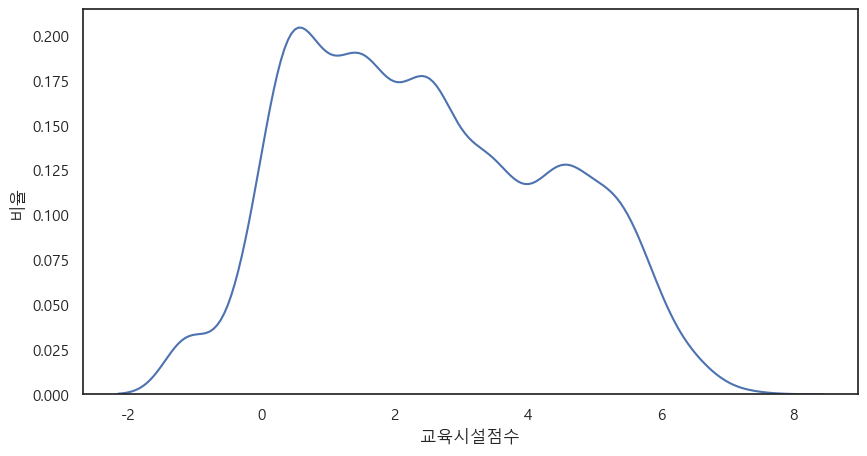

In [11]:
# 1) 교육시설점수
# 분포파악
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

plt.figure(figsize = (10,5))

kde = sns.kdeplot(df1['s1'])
kde.set_xlabel('교육시설점수')
kde.set_ylabel('비율')

# 왜도 첨도 확인
print("Skewness: %f" % df['s1'].skew())
print("Kurtosis: %f" % df['s1'].kurt())

Skewness: -3.075484
Kurtosis: 7.870479


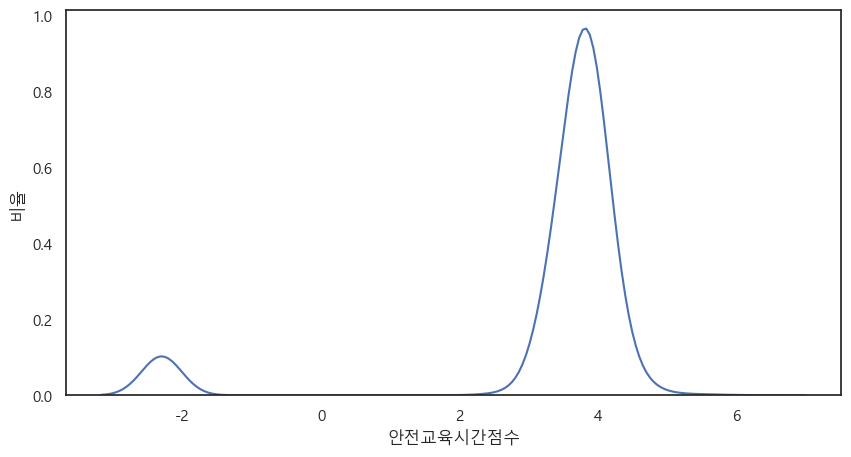

In [12]:
#2) 안전교육시간점수
plt.figure(figsize = (10,5))

kde = sns.kdeplot(df1['s3'])
kde.set_xlabel('안전교육시간점수')
kde.set_ylabel('비율')

# 왜도 첨도 확인
print("Skewness: %f" % df['s3'].skew())
print("Kurtosis: %f" % df['s3'].kurt())

Skewness: -2.426053
Kurtosis: 8.206709


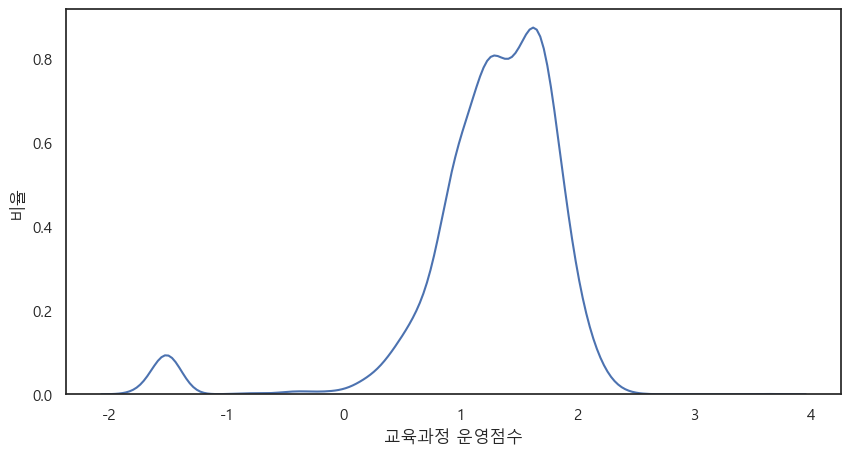

In [13]:
#3) 교육과정 운영점수
plt.figure(figsize = (10,5))

kde = sns.kdeplot(df1['s2'])
kde.set_xlabel('교육과정 운영점수')
kde.set_ylabel('비율')

# 왜도 첨도 확인
print("Skewness: %f" % df['s2'].skew())
print("Kurtosis: %f" % df['s2'].kurt())

Skewness: -7.013161
Kurtosis: 76.943977


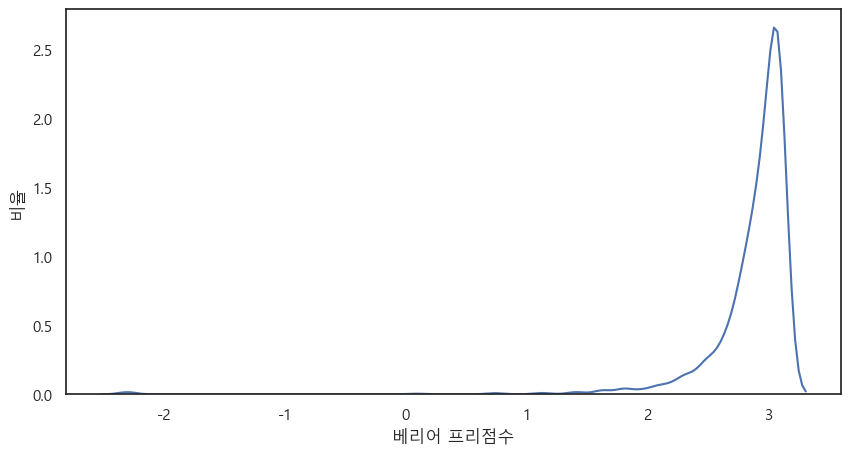

In [14]:
#4) 베리어 프리점수
plt.figure(figsize = (10,5))

kde = sns.kdeplot(df1['s4'])
kde.set_xlabel('베리어 프리점수')
kde.set_ylabel('비율')

# 왜도 첨도 확인
print("Skewness: %f" % df['s4'].skew())
print("Kurtosis: %f" % df['s4'].kurt())

Skewness: -0.768010
Kurtosis: 1.809077


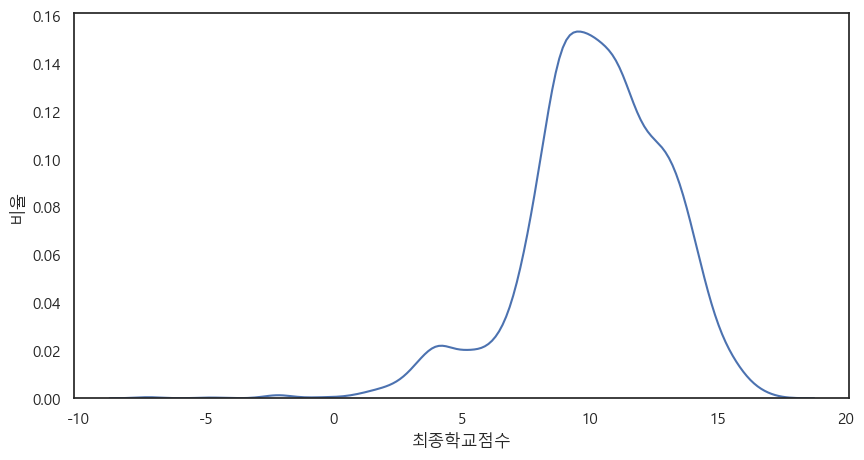

In [15]:
#5) 최종 학교평가 점수
plt.figure(figsize = (10,5))

kde = sns.kdeplot(df1['y'])
kde.set_xlabel('최종학교점수')
kde.set_ylabel('비율')

# 왜도 첨도 확인
print("Skewness: %f" % df['y'].skew())
print("Kurtosis: %f" % df['y'].kurt())

In [17]:
# 지역구별?
df_w = pd.DataFrame(df['지역'])
df1 = pd.concat([df_w , df1] , axis = 1)


,지역,y,s1,s2,s3,s4,key,공시 연도
0,서울특별시 서초구,8.681263,0.398137,0.846079,3.387774,3.049273,S000003511-2021,2021
1,서울특별시 서초구,9.588619,0.400476,1.205085,3.933784,3.049273,S000003511-2022,2022
2,서울특별시 서초구,9.657379,0.399695,1.274627,3.933784,3.049273,S000003511-2023,2023
3,서울특별시 서초구,9.262354,0.401258,1.253622,3.558201,3.049273,S000003511-2024,2024
4,서울특별시 성북구,9.617115,0.724635,0.806068,3.990834,3.095578,S000003514-2021,2021
...,...,...,...,...,...,...,...,...
5451,서울특별시 강동구,14.070926,5.298870,2.376945,3.299534,3.095578,S010006545-2022,2022
5452,서울특별시 강동구,15.626958,6.132120,2.208092,4.191169,3.095578,S010006545-2023,2023
5453,서울특별시 강동구,8.867671,6.020906,2.053772,-2.302585,3.095578,S010006545-2024,2024
5454,서울특별시 강동구,-7.241587,-1.151293,-1.485125,-2.302585,-2.302585,S010006553-2022,2022


In [23]:
# 분포가 괜찮았던 s1에 대해서 점수 평균
s1_w = df1.groupby(['지역'])['s1'].sum()
y_w = df1.groupby(['지역'])['y'].sum()
s1_w.sort_values(ascending= False)

지역
서울특별시 송파구     1018.049106
서울특별시 노원구     1004.659286
서울특별시 강서구      890.767911
서울특별시 강남구      699.384096
서울특별시 양천구      666.028846
서울특별시 구로구      597.401554
서울특별시 관악구      583.255135
서울특별시 성북구      560.872110
서울특별시 강동구      559.980460
서울특별시 중랑구      555.352811
서울특별시 도봉구      550.546372
서울특별시 은평구      526.076063
서울특별시 영등포구     502.403513
서울특별시 광진구      480.928869
서울특별시 마포구      439.611095
서울특별시 서초구      437.279550
서울특별시 종로구      411.503932
서울특별시 성동구      403.661195
서울특별시 서대문구     390.790442
서울특별시 동대문구     382.231755
서울특별시 용산구      379.291063
서울특별시 동작구      378.927241
서울특별시 금천구      348.689074
서울특별시 강북구      347.335093
서울특별시 중구       321.465441
Name: s1, dtype: float64

In [24]:
y_w.sort_values(ascending=False)

지역
서울특별시 노원구     4018.378298
서울특별시 송파구     3799.769662
서울특별시 강서구     3475.357093
서울특별시 강남구     3164.120608
서울특별시 은평구     2636.418227
서울특별시 양천구     2615.568200
서울특별시 강동구     2442.850352
서울특별시 관악구     2433.397196
서울특별시 성북구     2417.218606
서울특별시 구로구     2366.300622
서울특별시 중랑구     2115.010396
서울특별시 서초구     2029.800182
서울특별시 도봉구     2005.610035
서울특별시 마포구     1899.695148
서울특별시 영등포구    1881.403303
서울특별시 광진구     1864.590839
서울특별시 동대문구    1862.006915
서울특별시 동작구     1804.790631
서울특별시 종로구     1770.519785
서울특별시 성동구     1714.489883
서울특별시 서대문구    1709.668048
서울특별시 강북구     1508.327789
서울특별시 용산구     1461.672179
서울특별시 금천구     1443.725608
서울특별시 중구      1361.680329
Name: y, dtype: float64